In [1]:
!pip install pandas scikit-learn folium matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import IFrame

In [2]:
df = pd.read_csv('C:/Users/MSI KATANA/Desktop/practice ML/accident hotspot/accidents.csv')

In [3]:
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,4/1/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,5/1/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,6/1/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,7/1/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/1/2005,...,0,0,7,1,2,0,0,1,1,E01002863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,201091NM01760,311830.0,832450.0,-3.467828,57.374005,91,3,1,2,18/02/2010,...,0,0,1,1,1,0,0,2,1,NaN
1048571,201091NM01881,290880.0,817170.0,-3.809281,57.232273,91,3,1,1,21/02/2010,...,0,0,6,1,4,0,0,2,1,NaN
1048572,201091NM01935,288730.0,856520.0,-3.862727,57.585044,91,3,3,1,23/02/2010,...,0,0,1,1,4,0,0,2,1,NaN
1048573,201091NM01964,289940.0,815260.0,-3.823997,57.214898,91,2,2,1,23/02/2010,...,0,0,6,1,2,0,0,2,1,NaN


In [4]:
# Checking  missing values in the DataFrame
missing_values_in_data_frame = df.isnull()

# number of missing values in each column
missing_values_count_in_data_frame = df.isnull().sum()

# result
print("Missing Values in Each Column:")
print(missing_values_count_in_data_frame)

Missing Values in Each Column:
Accident_Index                                     0
Location_Easting_OSGR                            111
Location_Northing_OSGR                           111
Longitude                                        111
Latitude                                         111
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                             100
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail

In [5]:
df = df.dropna()
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,4/1/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,5/1/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,6/1/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,7/1/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/1/2005,...,0,0,7,1,2,0,0,1,1,E01002863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048278,201063DP42910,310850.0,291520.0,-3.315171,52.514222,63,3,1,1,21/12/2010,...,0,0,1,3,3,0,0,1,1,W01000480
1048279,201063DP43110,311640.0,292160.0,-3.303703,52.520103,63,3,2,1,16/10/2010,...,0,0,1,1,1,0,2,1,1,W01000481
1048280,201063DP43210,321900.0,218690.0,-3.135571,51.861265,63,3,2,1,8/11/2010,...,0,0,1,1,2,0,0,2,2,W01000435
1048281,201063DP43310,297250.0,266320.0,-3.507771,52.285350,63,3,1,1,27/12/2010,...,0,0,6,8,4,0,0,2,1,W01000477


In [6]:
# Checking  missing values in the DataFrame
missing_values_in_data_frame = df.isnull()

# number of missing values in each column
missing_values_count_in_data_frame = df.isnull().sum()

# result
print("Missing Values in Each Column:")
print(missing_values_count_in_data_frame)

Missing Values in Each Column:
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                      

In [7]:
df = df.drop_duplicates()
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,4/1/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,5/1/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,6/1/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,7/1/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/1/2005,...,0,0,7,1,2,0,0,1,1,E01002863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048278,201063DP42910,310850.0,291520.0,-3.315171,52.514222,63,3,1,1,21/12/2010,...,0,0,1,3,3,0,0,1,1,W01000480
1048279,201063DP43110,311640.0,292160.0,-3.303703,52.520103,63,3,2,1,16/10/2010,...,0,0,1,1,1,0,2,1,1,W01000481
1048280,201063DP43210,321900.0,218690.0,-3.135571,51.861265,63,3,2,1,8/11/2010,...,0,0,1,1,2,0,0,2,2,W01000435
1048281,201063DP43310,297250.0,266320.0,-3.507771,52.285350,63,3,1,1,27/12/2010,...,0,0,6,8,4,0,0,2,1,W01000477


In [8]:
selected_columns = df[['Number_of_Vehicles', 'Number_of_Casualties', 'Road_Surface_Conditions', 'Weather_Conditions', 'Accident_Severity', 'Light_Conditions']]

In [9]:
selected_columns

,Number_of_Vehicles,Number_of_Casualties,Road_Surface_Conditions,Weather_Conditions,Accident_Severity,Light_Conditions
0,1,1,2,2,2,1
1,1,1,1,1,3,4
2,2,1,1,1,3,4
3,1,1,1,1,3,1
4,1,1,2,1,3,7
...,...,...,...,...,...,...
1048278,1,1,3,3,3,1
1048279,2,1,1,1,3,1
1048280,2,1,2,1,3,1
1048281,1,1,4,8,3,6


In [10]:
selected_columns['Number_of_Vehicles'].unique()

array([ 1,  2,  4,  3,  5,  6,  8,  7, 13, 10, 11, 18,  9, 20, 17, 15, 12,
       14, 22, 16, 28, 32, 19], dtype=int64)

In [11]:
import numpy as np

# Calculate quartiles
Q1 = selected_columns['Number_of_Vehicles'].quantile(0.25)
Q3 = selected_columns['Number_of_Vehicles'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outliers
outliers = (selected_columns['Number_of_Vehicles'] < (Q1 - 1.5 * IQR)) | (selected_columns['Number_of_Vehicles'] > (Q3 + 1.5 * IQR))

# Count outliers
outliers_count = np.sum(outliers)

# Print count of outliers
print("Number of outliers:", outliers_count)


Number of outliers: 22850


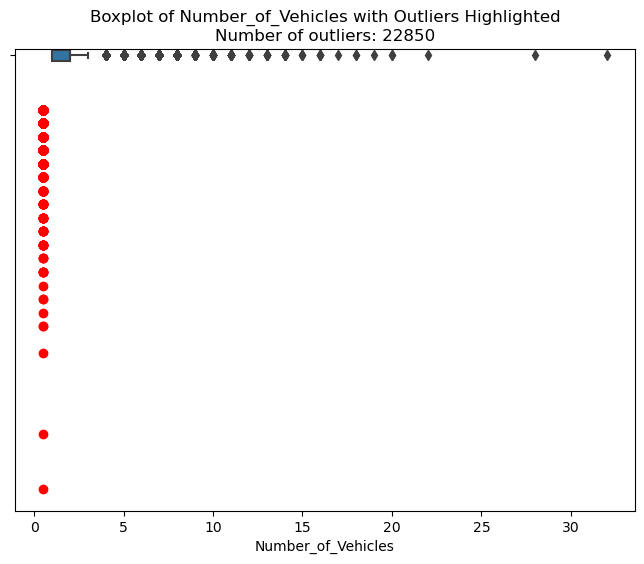

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=selected_columns['Number_of_Vehicles'])

# Highlight outliers
outlier_values = selected_columns[outliers]['Number_of_Vehicles']
plt.plot(np.ones_like(outlier_values) * 0.5, outlier_values, 'ro', markersize=6)

# Add labels and title
plt.xlabel('Number_of_Vehicles')
plt.title('Boxplot of Number_of_Vehicles with Outliers Highlighted\nNumber of outliers: {}'.format(outliers_count))

# Show plot
plt.show()

In [13]:
# using the domain knowledge i assume that maximum 9 vegicles can accidet and  others are outliers

In [14]:
# List of values to remove
values_to_remove = [13, 11, 18, 20, 17, 15, 12,
       14, 22, 16, 28, 32, 19]

# Filter the DataFrame to exclude rows with specified values
selected_columns = selected_columns[~selected_columns['Number_of_Vehicles'].isin(values_to_remove)]

selected_columns

,Number_of_Vehicles,Number_of_Casualties,Road_Surface_Conditions,Weather_Conditions,Accident_Severity,Light_Conditions
0,1,1,2,2,2,1
1,1,1,1,1,3,4
2,2,1,1,1,3,4
3,1,1,1,1,3,1
4,1,1,2,1,3,7
...,...,...,...,...,...,...
1048278,1,1,3,3,3,1
1048279,2,1,1,1,3,1
1048280,2,1,2,1,3,1
1048281,1,1,4,8,3,6


In [15]:
selected_columns['Number_of_Vehicles'].unique()

array([ 1,  2,  4,  3,  5,  6,  8,  7, 10,  9], dtype=int64)

In [16]:
selected_columns['Number_of_Casualties'].unique()

array([ 1,  2,  5,  4,  3,  8,  7,  6, 10,  9, 23, 17, 13, 11, 19, 15, 16,
       12, 14, 18, 20, 29, 22, 26, 45, 41, 36, 40, 25, 28, 42, 68, 27, 32,
       21, 62, 47, 48, 24, 43], dtype=int64)

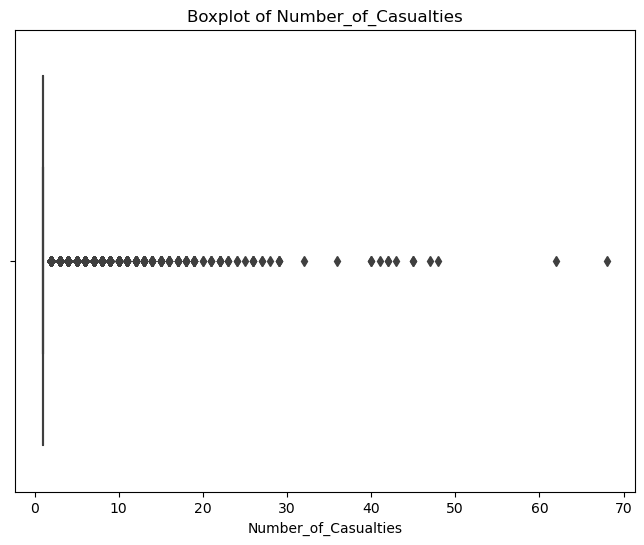

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=selected_columns['Number_of_Casualties'])

# Add labels and title
plt.xlabel('Number_of_Casualties')
plt.title('Boxplot of Number_of_Casualties')

# Show plot
plt.show()


In [18]:
# List of values to remove
values_to_remove = [68, 62]

# Filter the DataFrame to exclude rows with specified values
selected_columns = selected_columns[~selected_columns['Number_of_Casualties'].isin(values_to_remove)]

selected_columns

,Number_of_Vehicles,Number_of_Casualties,Road_Surface_Conditions,Weather_Conditions,Accident_Severity,Light_Conditions
0,1,1,2,2,2,1
1,1,1,1,1,3,4
2,2,1,1,1,3,4
3,1,1,1,1,3,1
4,1,1,2,1,3,7
...,...,...,...,...,...,...
1048278,1,1,3,3,3,1
1048279,2,1,1,1,3,1
1048280,2,1,2,1,3,1
1048281,1,1,4,8,3,6


In [19]:
selected_columns['Number_of_Casualties'].unique()

array([ 1,  2,  5,  4,  3,  8,  7,  6, 10,  9, 23, 17, 13, 11, 19, 15, 16,
       12, 14, 18, 20, 29, 22, 26, 45, 41, 36, 40, 25, 28, 42, 27, 32, 21,
       47, 48, 24, 43], dtype=int64)

In [20]:
selected_columns['Road_Surface_Conditions'].unique()

array([ 2,  1,  4,  3,  5, -1], dtype=int64)

In [21]:
# List of values to remove
values_to_remove = [-1]

# Filter the DataFrame to exclude rows with specified values
selected_columns = selected_columns[~selected_columns['Road_Surface_Conditions'].isin(values_to_remove)]

selected_columns

,Number_of_Vehicles,Number_of_Casualties,Road_Surface_Conditions,Weather_Conditions,Accident_Severity,Light_Conditions
0,1,1,2,2,2,1
1,1,1,1,1,3,4
2,2,1,1,1,3,4
3,1,1,1,1,3,1
4,1,1,2,1,3,7
...,...,...,...,...,...,...
1048278,1,1,3,3,3,1
1048279,2,1,1,1,3,1
1048280,2,1,2,1,3,1
1048281,1,1,4,8,3,6


In [22]:
selected_columns['Road_Surface_Conditions'].unique()    # find the meaning of 5

array([2, 1, 4, 3, 5], dtype=int64)

In [23]:
selected_columns['Weather_Conditions'].unique()

array([ 2,  1,  9,  3,  8,  4,  5,  7,  6, -1], dtype=int64)

In [24]:
# List of values to remove
values_to_remove = [9, 8, -1]

# Filter the DataFrame to exclude rows with specified values
selected_columns = selected_columns[~selected_columns['Weather_Conditions'].isin(values_to_remove)]

selected_columns

,Number_of_Vehicles,Number_of_Casualties,Road_Surface_Conditions,Weather_Conditions,Accident_Severity,Light_Conditions
0,1,1,2,2,2,1
1,1,1,1,1,3,4
2,2,1,1,1,3,4
3,1,1,1,1,3,1
4,1,1,2,1,3,7
...,...,...,...,...,...,...
1048276,1,1,2,1,2,6
1048277,2,1,2,1,2,6
1048278,1,1,3,3,3,1
1048279,2,1,1,1,3,1


In [25]:
selected_columns['Weather_Conditions'].unique()

array([2, 1, 3, 4, 5, 7, 6], dtype=int64)

In [26]:
selected_columns['Accident_Severity'].unique()

array([2, 3, 1], dtype=int64)

In [27]:
selected_columns['Light_Conditions'].unique()  # this is ok

array([1, 4, 7, 5, 6], dtype=int64)

In [28]:
null_values = selected_columns.isnull().sum()

In [29]:
print("Null Values in Selected Columns:")
print(null_values)

Null Values in Selected Columns:
Number_of_Vehicles         0
Number_of_Casualties       0
Road_Surface_Conditions    0
Weather_Conditions         0
Accident_Severity          0
Light_Conditions           0
dtype: int64


In [30]:
duplicates = selected_columns[selected_columns.duplicated(keep=False)]
# Print the duplicate rows
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
         Number_of_Vehicles  Number_of_Casualties  Road_Surface_Conditions  \
0                         1                     1                        2   
1                         1                     1                        1   
2                         2                     1                        1   
3                         1                     1                        1   
4                         1                     1                        2   
...                     ...                   ...                      ...   
1048276                   1                     1                        2   
1048277                   2                     1                        2   
1048278                   1                     1                        3   
1048279                   2                     1                        1   
1048280                   2                     1                        2   

         Weather_Conditions  Accident_Severity 

In [31]:
selected_columns

,Number_of_Vehicles,Number_of_Casualties,Road_Surface_Conditions,Weather_Conditions,Accident_Severity,Light_Conditions
0,1,1,2,2,2,1
1,1,1,1,1,3,4
2,2,1,1,1,3,4
3,1,1,1,1,3,1
4,1,1,2,1,3,7
...,...,...,...,...,...,...
1048276,1,1,2,1,2,6
1048277,2,1,2,1,2,6
1048278,1,1,3,3,3,1
1048279,2,1,1,1,3,1


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X = selected_columns[['Number_of_Vehicles', 'Number_of_Casualties', 'Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions']]
y = selected_columns['Accident_Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8558093588266033


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for class imbalance
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for class imbalance
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for class imbalance
print("F1-score:", f1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8558093588266033
Precision: 0.7691814169584648
Recall: 0.8558093588266033
F1-score: 0.7897182610794337
Confusion Matrix:
[[     2     12   3737]
 [    15     28  36445]
 [    14     63 239078]]


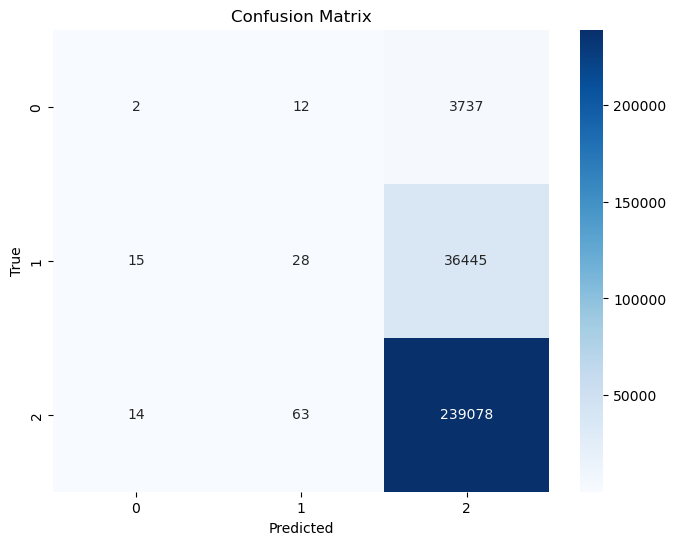

Classification Report:
              precision    recall  f1-score   support

           1       0.06      0.00      0.00      3751
           2       0.27      0.00      0.00     36488
           3       0.86      1.00      0.92    239155

    accuracy                           0.86    279394
   macro avg       0.40      0.33      0.31    279394
weighted avg       0.77      0.86      0.79    279394



In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))



In [35]:
# Sample new data
new_data_example = {
    'Number_of_Vehicles': [2],  # Example values
    'Number_of_Casualties': [1],  # Example values
    'Weather_Conditions': [2],  # Example values
    'Road_Surface_Conditions' : [2], # Example values
    'Light_Conditions' : [4] # Example values
}



In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = selected_columns[['Number_of_Vehicles', 'Number_of_Casualties', 'Weather_Conditions', 'Road_Surface_Conditions']]
y = selected_columns['Accident_Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Get probabilities for each class
y_prob = model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display probabilities for each class
print("Probabilities for each severity level:")
for i, prob in enumerate(y_prob[:5]):  # Displaying probabilities for first 5 predictions
    print(f"Sample {i+1}: Class 1 (Fatal) - {prob[0]:.4f}, Class 2 (Serious) - {prob[1]:.4f}, Class 3 (Slight) - {prob[2]:.4f}")


Accuracy: 0.85574135450296
Probabilities for each severity level:
Sample 1: Class 1 (Fatal) - 0.0104, Class 2 (Serious) - 0.1112, Class 3 (Slight) - 0.8784
Sample 2: Class 1 (Fatal) - 0.0075, Class 2 (Serious) - 0.0707, Class 3 (Slight) - 0.9218
Sample 3: Class 1 (Fatal) - 0.0071, Class 2 (Serious) - 0.0635, Class 3 (Slight) - 0.9294
Sample 4: Class 1 (Fatal) - 0.0100, Class 2 (Serious) - 0.1016, Class 3 (Slight) - 0.8885
Sample 5: Class 1 (Fatal) - 0.0139, Class 2 (Serious) - 0.1706, Class 3 (Slight) - 0.8155


In [37]:
from sklearn.linear_model import LogisticRegression
import numpy as np

X = selected_columns[['Number_of_Vehicles', 'Number_of_Casualties', 'Weather_Conditions', 'Road_Surface_Conditions']]
y = selected_columns['Accident_Severity']

# Initialize and train a logistic regression model using the entire dataset
model = LogisticRegression()
model.fit(X, y)

# Get probabilities for each class for the entire dataset
y_prob = model.predict_proba(X)

# Display probabilities for each class
severity_labels = ['Fatal', 'Serious', 'Slight']
print("Probabilities for each severity level:")
for i, prob in enumerate(y_prob):
    print(f"Sample {i+1}:")
    for j, label in enumerate(severity_labels):
        print(f"Probability of {label} accident: {prob[j]:.4f}")


Probabilities for each severity level:
Sample 1:
Probability of Fatal accident: 0.0132
Probability of Serious accident: 0.1537
Probability of Slight accident: 0.8331
Sample 2:
Probability of Fatal accident: 0.0137
Probability of Serious accident: 0.1706
Probability of Slight accident: 0.8157
Sample 3:
Probability of Fatal accident: 0.0103
Probability of Serious accident: 0.1111
Probability of Slight accident: 0.8786
Sample 4:
Probability of Fatal accident: 0.0137
Probability of Serious accident: 0.1706
Probability of Slight accident: 0.8157
Sample 5:
Probability of Fatal accident: 0.0132
Probability of Serious accident: 0.1565
Probability of Slight accident: 0.8303
Sample 6:
Probability of Fatal accident: 0.0098
Probability of Serious accident: 0.0994
Probability of Slight accident: 0.8908
Sample 7:
Probability of Fatal accident: 0.0103
Probability of Serious accident: 0.1111
Probability of Slight accident: 0.8786
Sample 8:
Probability of Fatal accident: 0.0210
Probability of Serious a

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = selected_columns[['Number_of_Vehicles', 'Number_of_Casualties', 'Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions']]
y = selected_columns['Accident_Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Random Forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8555623957565303


In [39]:
from sklearn.metrics import classification_report

# Generate classification report
classification_rep = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           1       0.19      0.00      0.00      3751
           2       0.31      0.00      0.01     36488
           3       0.86      1.00      0.92    239155

    accuracy                           0.86    279394
   macro avg       0.45      0.33      0.31    279394
weighted avg       0.78      0.86      0.79    279394



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their values to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Initialize the RandomForestClassifier with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Train the model with the best parameters
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after hyperparameter tuning:", accuracy)
